<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Demo: NN with Keras
INSTRUCTIONS:
- Run the cells
- Observe and understand the results
- Answer the questions

## Written digits classification with Keras

In [1]:
## Import libraries
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

# import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

In [2]:
# The digits dataset
digits = load_digits()

In [3]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [5]:
digits.target   #target is a multiclass

array([0, 1, 2, ..., 8, 9, 8])

In [12]:
digits.images

array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ..., 15.,  5.,  0.],
        [ 0.,  3., 15., ..., 11.,  8.,  0.],
        ...,
        [ 0.,  4., 11., ..., 12.,  7.,  0.],
        [ 0.,  2., 14., ..., 12.,  0.,  0.],
        [ 0.,  0.,  6., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
        [ 0.,  0.,  0., ...,  9.,  0.,  0.],
        [ 0.,  0.,  3., ...,  6.,  0.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.]],

       [[ 0.,  0.,  0., ..., 12.,  0.,  0.],
        [ 0.,  0.,  3., ..., 14.,  0.,  0.],
        [ 0.,  0.,  8., ..., 16.,  0.,  0.],
        ...,
        [ 0.,  9., 16., ...,  0.,  0.,  0.],
        [ 0.,  3., 13., ..., 11.,  5.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.]],

       ...,

       [[ 0.,  0.,  1., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ...,  2.,  1.,  0.],
        [ 0.,  0., 16., ..., 16.,  5.,  0.

In [6]:
len(digits.target)

1797

In [7]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [9]:
digits.images[1796]   #with human eye, we cant determine what number is this image, but with CNN, we can 

array([[ 0.,  0., 10., 14.,  8.,  1.,  0.,  0.],
       [ 0.,  2., 16., 14.,  6.,  1.,  0.,  0.],
       [ 0.,  0., 15., 15.,  8., 15.,  0.,  0.],
       [ 0.,  0.,  5., 16., 16., 10.,  0.,  0.],
       [ 0.,  0., 12., 15., 15., 12.,  0.,  0.],
       [ 0.,  4., 16.,  6.,  4., 16.,  6.,  0.],
       [ 0.,  8., 16., 10.,  8., 16.,  8.,  0.],
       [ 0.,  1.,  8., 12., 14., 12.,  1.,  0.]])

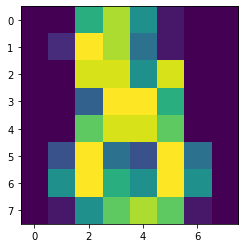

In [10]:
plt.imshow(digits.images[1796])

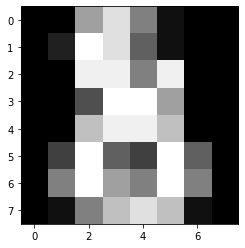

In [11]:
plt.imshow(digits.images[1796], cmap ='gray')

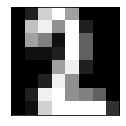

In [13]:
id = np.random.randint(len(digits.target))
plt.figure(figsize = (2, 2))
plt.imshow(digits.images[id], cmap = 'gray')  #shows image
plt.xticks([])  #removes "ticker"
plt.yticks([])
plt.show()

In [14]:
# Prepare input data
# input
X = digits.data.astype(np.uint8)  #changing integer 8 byte ("good habit")
n_cols = X.shape[1]

# output
target = digits.target.astype(np.uint8)

# Convert the target to categorical    #its similar to one hot encoding
y = to_categorical(
    target,
    num_classes = len(set(target)),
    dtype = 'uint8')

In [15]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [16]:
X.shape

(1797, 64)

In [17]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [18]:
y

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 1, 0]], dtype=uint8)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size = 0.3,
    random_state = 65)

In [20]:
# Set up the model architecture
model = Sequential()

In [21]:
# Add the first hidden layer
model.add(Dense(100, activation = 'relu', input_shape = (n_cols, )))   #100 neurons, 64 features(inputshape), 
#theres a space in input shape bracket (n_cols, .....) because we want to test on all images 1767, if you want to test on just 100, then specify 100

# Add the second hidden layer
model.add(Dense(50, activation = 'relu'))   #can use different activation function for different hidden layers but not very commonly used 

# Add the output layer
model.add(Dense(10, activation = 'softmax'))  #softmax is used because target is multiclass #10 neurons because there are 10 target variables (0-9) 
#the above line of code is only used for multiclass , for binary class , use "sigmoid" activation function

In [22]:
print(model.summary())   #there are total of 12060 trainabale parameters (of weights and bias) 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               6500      
_________________________________________________________________
dense_1 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                510       
Total params: 12,060
Trainable params: 12,060
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
#applying more hidden layers mean more computationally expensive

In [23]:
# Compile the model
model.compile(optimizer = 'sgd', loss = 'categorical_crossentropy', metrics = ['accuracy'])

#categorical crossentropy - for multiclass, if its binary class, a different cross entropy is chosen
#can change metrics to recall, roc etc

In [26]:
%%time
# Fit the model
history = model.fit(
    X_train,
    y_train,
    validation_split = 0.25,   #splitting training data (X_train) to 75% and 25%
    batch_size = 20,
    epochs = 100,
    verbose = 1)

Epoch 1/100
48/48 [==============================] - 0s 1ms/step - loss: 8.3014e-04 - accuracy: 1.0000 - val_loss: 0.1303 - val_accuracy: 0.9714
Epoch 2/100
48/48 [==============================] - 0s 917us/step - loss: 8.2569e-04 - accuracy: 1.0000 - val_loss: 0.1300 - val_accuracy: 0.9714
Epoch 3/100
48/48 [==============================] - 0s 804us/step - loss: 8.2189e-04 - accuracy: 1.0000 - val_loss: 0.1305 - val_accuracy: 0.9714
Epoch 4/100
48/48 [==============================] - 0s 800us/step - loss: 8.1633e-04 - accuracy: 1.0000 - val_loss: 0.1308 - val_accuracy: 0.9714
Epoch 5/100
48/48 [==============================] - 0s 798us/step - loss: 8.1069e-04 - accuracy: 1.0000 - val_loss: 0.1306 - val_accuracy: 0.9714
Epoch 6/100
48/48 [==============================] - 0s 875us/step - loss: 8.0533e-04 - accuracy: 1.0000 - val_loss: 0.1310 - val_accuracy: 0.9714
Epoch 7/100
48/48 [==============================] - 0s 868us/step - loss: 8.0370e-04 - accuracy: 1.0000 - val_loss: 0.1

48/48 [==============================] - 0s 844us/step - loss: 6.2737e-04 - accuracy: 1.0000 - val_loss: 0.1330 - val_accuracy: 0.9714
Epoch 57/100
48/48 [==============================] - 0s 797us/step - loss: 6.2090e-04 - accuracy: 1.0000 - val_loss: 0.1326 - val_accuracy: 0.9714
Epoch 58/100
48/48 [==============================] - 0s 1ms/step - loss: 6.1763e-04 - accuracy: 1.0000 - val_loss: 0.1327 - val_accuracy: 0.9714
Epoch 59/100
48/48 [==============================] - 0s 1ms/step - loss: 6.1456e-04 - accuracy: 1.0000 - val_loss: 0.1324 - val_accuracy: 0.9714
Epoch 60/100
48/48 [==============================] - 0s 943us/step - loss: 6.1223e-04 - accuracy: 1.0000 - val_loss: 0.1324 - val_accuracy: 0.9714
Epoch 61/100
48/48 [==============================] - 0s 859us/step - loss: 6.1131e-04 - accuracy: 1.0000 - val_loss: 0.1324 - val_accuracy: 0.9714
Epoch 62/100
48/48 [==============================] - 0s 838us/step - loss: 6.0759e-04 - accuracy: 1.0000 - val_loss: 0.1321 - va

In [27]:
history = model.fit(
    X_train,
    y_train,
    validation_split = 0.25,   #splitting training data (X_train) to 75% and 25%
    batch_size = 20,
    epochs = 100,
    verbose = 0)  #0 wont give any response like above

In [28]:
predictions = model.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [29]:
predictions

array([0, 7, 6, 9, 7, 5, 3, 0, 1, 3, 7, 7, 4, 3, 4, 1, 3, 8, 5, 3, 5, 3,
       1, 2, 9, 6, 1, 6, 0, 1, 5, 4, 5, 0, 7, 9, 1, 1, 1, 6, 5, 9, 4, 1,
       9, 4, 7, 7, 4, 3, 9, 4, 8, 3, 0, 9, 6, 8, 7, 2, 2, 5, 8, 7, 4, 3,
       2, 1, 6, 9, 9, 4, 8, 1, 7, 2, 8, 6, 6, 7, 3, 0, 8, 3, 0, 1, 0, 2,
       9, 4, 2, 3, 0, 1, 7, 7, 3, 9, 4, 5, 2, 2, 3, 8, 4, 2, 1, 2, 7, 2,
       2, 3, 2, 5, 1, 4, 0, 8, 5, 5, 0, 1, 0, 8, 0, 9, 8, 1, 8, 1, 9, 5,
       9, 1, 7, 5, 8, 9, 3, 6, 9, 7, 9, 5, 6, 2, 4, 3, 5, 3, 7, 4, 9, 4,
       3, 4, 1, 6, 4, 2, 3, 1, 5, 6, 8, 5, 0, 1, 5, 0, 6, 9, 6, 4, 4, 5,
       0, 0, 2, 6, 1, 6, 4, 2, 6, 8, 0, 9, 2, 8, 9, 0, 8, 5, 8, 9, 5, 9,
       3, 2, 7, 6, 1, 9, 7, 5, 3, 0, 2, 0, 0, 5, 1, 9, 5, 6, 5, 5, 0, 8,
       4, 4, 5, 7, 1, 9, 5, 7, 6, 5, 1, 1, 2, 0, 0, 0, 8, 1, 2, 2, 3, 4,
       8, 7, 7, 6, 7, 5, 5, 5, 8, 6, 6, 8, 7, 6, 2, 6, 7, 6, 3, 2, 5, 5,
       7, 7, 0, 5, 4, 6, 9, 5, 9, 2, 4, 6, 7, 5, 0, 4, 9, 6, 0, 5, 2, 7,
       7, 8, 9, 3, 6, 8, 0, 7, 4, 6, 2, 9, 6, 1, 1,

In [39]:
model.predict(X_test)  # probability for every class (0-9) for each of the images, 

array([[9.99999404e-01, 3.06425336e-11, 1.09670644e-07, ...,
        1.70322284e-10, 7.12338633e-09, 1.12112630e-07],
       [5.84718973e-14, 7.50234111e-11, 1.50968449e-09, ...,
        9.99996185e-01, 9.48206069e-10, 1.27741859e-10],
       [4.90857879e-08, 3.69218232e-11, 1.13017573e-09, ...,
        4.42551107e-10, 1.48551385e-06, 4.67666478e-16],
       ...,
       [1.07006937e-08, 8.22991666e-08, 2.81087292e-10, ...,
        2.55070201e-11, 1.91384152e-05, 8.20575297e-14],
       [9.99734700e-01, 1.27702677e-07, 4.30482400e-10, ...,
        6.26068433e-11, 2.53765552e-06, 1.50713877e-08],
       [6.93993224e-03, 7.75291724e-08, 9.59984899e-01, ...,
        1.61045843e-08, 1.68418446e-10, 2.61254201e-04]], dtype=float32)

In [30]:
score = model.evaluate(X_test, y_test, batch_size = 315)   #similar to sklearn model.score 
print('\nTest loss: %.6f, Test accuracy: %.6f' % tuple(score))

2/2 [==============================] - 0s 1ms/step - loss: 0.0978 - accuracy: 0.9741

Test loss: 0.097799, Test accuracy: 0.974074


In [31]:
def print_cm(cm):
    c = '%%%dd ' % len('%d' % cm.max())
    s = ' | '
    s += ''.join([c % i for i in range(len(cm[0]))])
    print(s)
    print('-' * len(s))
    for i, r in enumerate(cm):
        s = '%d| ' % i
        s += c * len(r)
        print(s % tuple(r))

In [32]:
y_test_target = np.array([x.argmax() for x in y_test])
cm = confusion_matrix(y_test_target, predictions)
print_cm(cm)

#actual on top, #predictions on left

 |  0  1  2  3  4  5  6  7  8  9 
---------------------------------
0| 54  0  0  0  1  0  0  0  0  0 
1|  1 52  1  0  0  0  0  0  1  0 
2|  0  0 49  0  0  0  0  0  0  0 
3|  0  0  0 49  0  3  0  0  0  0 
4|  0  0  0  0 55  0  0  0  0  0 
5|  0  0  0  0  0 60  0  0  0  0 
6|  0  0  0  0  0  0 60  0  1  0 
7|  0  0  0  0  0  0  0 51  0  1 
8|  0  1  0  0  0  1  1  0 46  0 
9|  0  1  0  0  0  1  0  0  0 50 


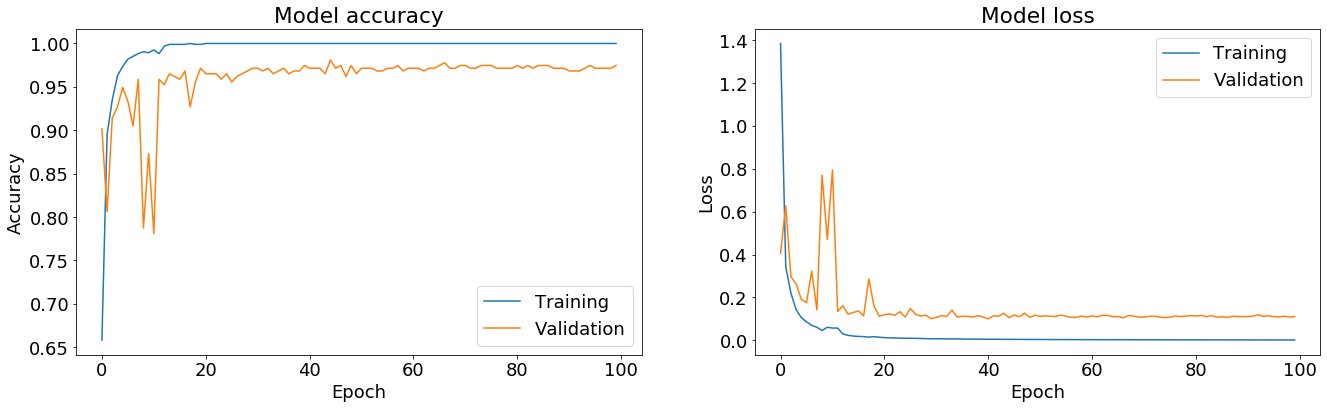

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (18, 6))
fig.subplots_adjust(left = 0.02, right = 0.98, wspace = 0.2)

plt.rcParams.update({'font.size': 18})

# Plot training & validation accuracy values
ax[0].plot(model.history.history['accuracy'], label = 'Training')
ax[0].plot(model.history.history['val_accuracy'], label = 'Validation')
ax[0].set_title('Model accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend()

# Plot training & validation loss values
ax[1].plot(model.history.history['loss'], label = 'Training')
ax[1].plot(model.history.history['val_loss'], label = 'Validation')
ax[1].set_title('Model loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend()

plt.show()

In [33]:
def show_digit():
    id = np.random.randint(len(predictions))
    XTest = X_test[id].reshape(8, 8)
    plt.figure(figsize = (2, 2))
    plt.imshow(XTest, cmap = 'gray')
    plt.title('Prediction: %d' % predictions[id])
    plt.xticks([])
    plt.yticks([])
    plt.show()

In [37]:
def show_10_digits():
    fig, ax = plt.subplots(2, 5, figsize = (8, 4))
    fig.subplots_adjust(left = 0.02, right = 0.98, top = 0.8, wspace = 0.2, hspace = 0.3)
    fig.suptitle('Ten Predictions', fontsize = 12, fontweight = 'bold')

    plt.rcParams.update({'font.size': 10})
    
    ids = np.random.randint(len(predictions), size = 10)
    r = 0
    c = 0
    for id in ids:
        XTest = X_test[id].reshape(8, 8)

        # original image
        ax[r, c].imshow(XTest, cmap = 'gray')
        ax[r, c].set_title('Prediction: %d' % predictions[id])
        ax[r, c].set_xticks([])
        ax[r, c].set_yticks([])
        c += 1
        if c > 4:
            r += 1
            c = 0

    plt.show()

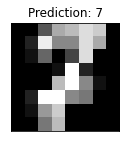

In [36]:
# show one
show_digit()

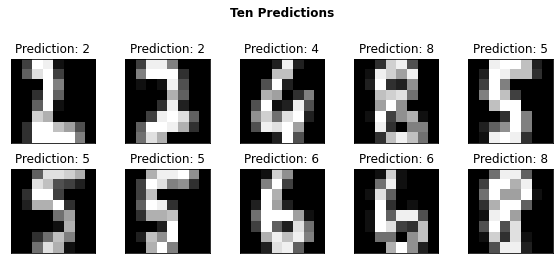

In [38]:
# show ten
show_10_digits()



---



---



> > > > > > > > > © 2021 Institute of Data


---



---